In [4]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [6]:
#Leer imagenes
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
trainSet = np.array(load_images_from_folder("/home/robdres/University/Redes/train/"))
#testSet = np.array(load_images_from_folder("/home/robdres/University/SextoSemestre/RedesNeuronales/Deberes/Deber3/test/"))/

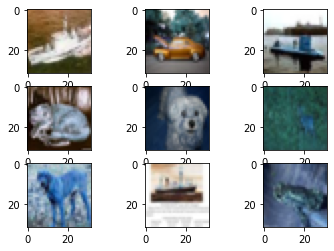

In [36]:
#mostrar imagenes
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainSet[i])
plt.savefig("imgs.jpg")

In [ ]:
#inner product
def pp(s,v):
    return np.sum(s*v)

#get N
def getN(v):
    return v.shape[0]-int(v.shape[0]/2 +1)

#image padding
def padding(img,ven):
    n = getN(ven)
    (x,y,z) = img.shape[0]+(2*n),img.shape[1]+(2*n),img.shape[2]
    aux = np.zeros([x,y,z])
    for i in range(len(img)):
        for j in range(len(img)):
            aux[n+i,j+n] = img[i,j]
    return aux

In [13]:
def conv(img,ven,p= True):
    if(p == True):
        img = padding(img,ven)
    n = getN(ven)
    (x,y,z) = img.shape
    result = np.zeros(shape =[x-2*n,y-2*n,z])
    for l in range(z):
        for i in range(n,x-n): 
            for j in range(n,y-n):
                seccion = img[i-n:i+n+1,j-n:j+n+1,l]
                result[i-n,j-n,l] = pp(seccion,ven)
    return result

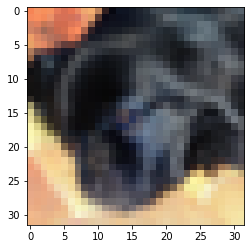

In [42]:
#analizar una imagen
plt.imshow(trainSet[1000])
plt.savefig("1.jpg")

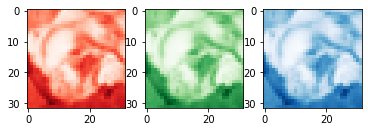

In [66]:
#ver cada capa
plt.subplot(1,3,1)
plt.imshow(trainSet[1000,:,:,i%3],cmap="Reds")
plt.subplot(132)
plt.imshow(trainSet[1000,:,:,i%3],cmap="Greens")
plt.subplot(133)
plt.imshow(trainSet[1000,:,:,i%3],cmap="Blues")
plt.savefig("2.jpg")

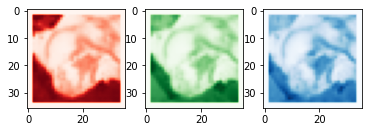

In [72]:
#padding a cada capa
v = np.array([[0,1,0,1,1],[1,1,1,1,0],[1,1,0,1,0],[1,1,0,1,0],[1,1,0,1,0]])
imgC = padding(trainSet[1000],v) 
plt.subplot(131)
plt.imshow(imgC[:,:,0],cmap="Reds")
plt.subplot(132)
plt.imshow(imgC[:,:,1],cmap="Greens")
plt.subplot(133)
plt.imshow(imgC[:,:,2],cmap="Blues")
plt.savefig("3.jpg")

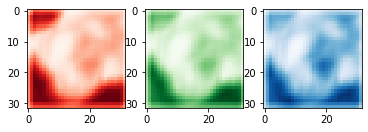

In [73]:
#capa capa convolucionada
v = np.array([[0,1,0,1,1],[1,1,1,1,0],[1,1,0,1,0],[1,1,0,1,0],[1,1,0,1,0]])
imgC = conv(trainSet[1000],v) 
plt.subplot(131)
plt.imshow(imgC[:,:,0],cmap="Reds")
plt.subplot(132)
plt.imshow(imgC[:,:,1],cmap="Greens")
plt.subplot(133)
plt.imshow(imgC[:,:,2],cmap="Blues")
plt.savefig("4.jpg")

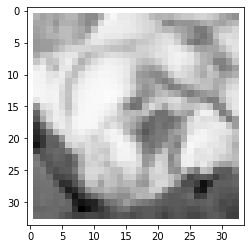

In [15]:
#proving padding
v = np.random.rand(5,5)
v = np.array([[1,1,1],[0,0,0],[1,1,1]])
v.shape[0]-int(v.shape[0]/2 +1)
x = padding(trainSet[1000],v)
plt.imshow(x[:,:,2],"Greys")

In [8]:
#pregunta1 
def conv(img,ven,p= True):
    if(p == True):
        img = padding(img,ven)
    n = getN(ven)
    (x,y,z) = img.shape
    result = np.zeros(shape =[x-2*n,y-2*n,z])
    for l in range(z):
        for i in range(n,x-n): 
            for j in range(n,y-n):
                seccion = img[i-n:i+n+1,j-n:j+n+1,l]
                result[i-n,j-n,l] = pp(seccion,ven)
    return result

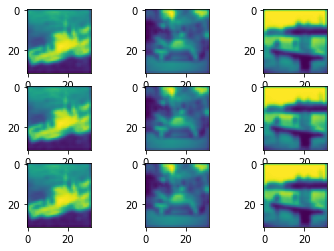

In [103]:
#Cada capa convolucionada de diferentes imagenes
v = np.array([[0,1,0],[1,1,1],[0,1,0]])
imgC = conv(trainSet[0],v)
plt.imshow(imgC[:,:,1])
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(conv(trainSet[i%3],v)[:,:,i%3])
plt.show()
# cada capa convolucionada

In [32]:
#pregunta2
#kernel
def kernel(n,k,random= True): 
    k = 2*k+1
    if random==True:
        return np.abs(np.random.randn(n,k,k))
    else:
        T = np.zeros(shape=[n,k,k])
        for ia in range(n):
            h = input("Ingresar los valores del kernel separados por un espacio")
            x = [float(a) for a in h.split(" ")]
            it = 0
            for i in range(k):
                for j in range(k):
                    T[ia,i,j] = x[it]
                    it+=1
                    
        return T
#hay la posibilidad que sea igual
kernel(1,1,False)

Ingresar los valores del kernel separados por un espacio 1 1 1 1 1 1 1 1 1


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [76]:
#Convolusion de tensor de imagenes
def convI(Ima,ker):
    result = []
    for i in ker:
        aux = []
        for j in Ima:
            aux.append(conv(j,i))
        result.append(aux)
    return np.array(result)

In [81]:
# kernel interpretador que se va a utilizar
k1 = kernel(3,2)

In [83]:
#Convolucionar solo las primeras 1000 imagenes
trainSet1 = trainSet[0:1000]
ImaCon = convI(trainSet1,k1)

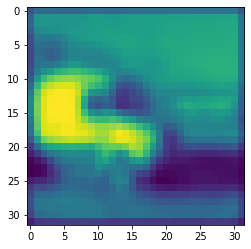

In [14]:
#mostrar imagenes convolucionada 
plt.imshow(ImaCon[0,1,:,:,1])

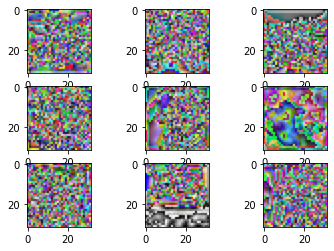

In [117]:
#Prueba 
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(ImaCon[0,i,:,:,:].astype(np.uint8))

plt.savefig('7.png')

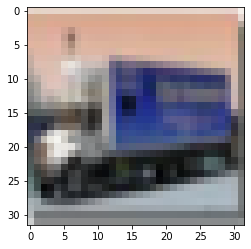

In [98]:
#Iamgen a analizar
plt.imshow(trainSet[900])
plt.savefig('5.jpg')

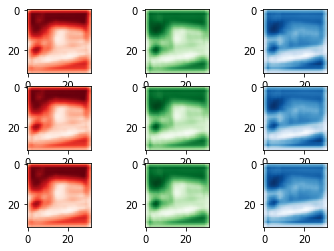

In [97]:
#IMagen convoluscionada cada capa
plt.subplot(331)
plt.imshow(ImaCon[0,900,:,:,0],cmap='Reds')
plt.subplot(332)
plt.imshow(ImaCon[1,900,:,:,1],cmap='Greens')
plt.subplot(333)
plt.imshow(ImaCon[2,900,:,:,2],cmap='Blues')
plt.subplot(334)
plt.imshow(ImaCon[0,900,:,:,0],cmap='Reds')
plt.subplot(335)
plt.imshow(ImaCon[1,900,:,:,1],cmap='Greens')
plt.subplot(336)
plt.imshow(ImaCon[2,900,:,:,2],cmap='Blues')
plt.subplot(337)
plt.imshow(ImaCon[0,900,:,:,0],cmap='Reds')
plt.subplot(338)
plt.imshow(ImaCon[1,900,:,:,1],cmap='Greens')
plt.subplot(339)
plt.imshow(ImaCon[2,900,:,:,2],cmap='Blues')
plt.savefig("6.jpg")

In [16]:
#Red neuronal 

In [17]:
#Funcion msoft para una matrix, es mas sencillo definirla asi, 
#Conseguimos una matriz resultante donde cada fila es un vector de probabilidad 
def msoft(Y):
    f = np.zeros((len(Y),10))
    for i in range(len(Y)):
        s = np.sum(np.exp(Y[i]))
        a = np.zeros(10,dtype =np.float128)
        for j in range(10):
            a[j] = np.exp(Y[i,j])/s
        f[i] = a
    return f
def mgrad(x,y,w):
    p = x@w 
    p = msoft(p)
    m = len(x)
    w = -(1/m)*x.T@(y - p)
    return w

# Creacion de random epocas para el testing set
def epoch(X,Y,n):
    indices = list(range(len(X)))
    div = len(X)/n
    ind = np.random.permutation(indices)
    ind = np.split(ind,div)
    batches = []
    for i in range(len(ind)):
        batches.append([X[ind[i]],Y[ind[i]]])
    return batches

#calculo de la matriz de transicion para los pesos
def p_i(x, w):
    x = np.c_[np.ones(len(x)),x]
    z = x@w 
    h = msoft(z)
    pe = np.zeros_like(h)
    for i in range(len(pe)):
        pe[np.arange(len(h)), h.argmax(1)] = 1 
    return pe

#funcion de perdida
def loss(y,x,w):
    x = np.c_[np.ones(len(x)),x]
    z = x@w
    h = msoft(z)
    return   1/len(y)*np.sum(np.sum(y*np.log(h)))

def bienClasificados(Y,Yt):
    return np.sum(Y==Yt)/(len(Y)*len(Y[0]))

In [18]:
#Funcion red neuronal para 50 epocas por defecto
def redn(X,Y,ep=50,le=50,it =200,alpha = 0.0001):
    los = [] #Para guardar las perdidas
    w = np.random.random((len(X[0])+1,10))
    #loop entre cada epoca
    for i in range(ep):
        #crecion de una nueva eopca
        E = epoch(X,Y,le)
        #disminucion dl gradiente
        for x,y in E:
            x = np.c_[np.ones(len(x)).T,x]
            pi = x@w
            for i in range(it):
                w = w - alpha*(mgrad(x,y,w))
            los.append(loss(Y,X,w))
    return w,los

In [119]:
#Primero cambiamos a grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
imgbn = rgb2gray(trainSet[2])
trainSetWB = rgb2gray(trainSet)

trainSetWB[0].shape

(32, 32)

(32, 32)

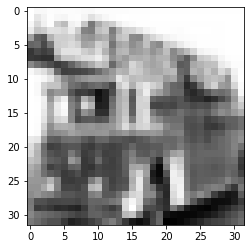

In [120]:
#probar imagen
plt.imshow(trainSetWB[847],cmap='gray')
trainSetWB[0].shape

In [123]:
# interpretar los datos 
trainLabel = pd.read_csv("trainLabels.csv")
print(trainLabel.shape)

(50000, 2)


In [125]:
#proceso de rotulacion
trainLabel = pd.read_csv("trainLabels.csv")
Y = np.zeros([trainLabel.shape[0],10])
trainLabel = pd.read_csv("trainLabels.csv")
trainLabel[trainLabel['label']=='airplane']=1
trainLabel[trainLabel['label']=='automobile']=2
trainLabel[trainLabel['label']=='bird']=3
trainLabel[trainLabel['label']=='cat']=4
trainLabel[trainLabel['label']=='deer']=5
trainLabel[trainLabel['label']=='dog']=6
trainLabel[trainLabel['label']=='frog']=7
trainLabel[trainLabel['label']=='horse']=8
trainLabel[trainLabel['label']=='ship']=9
trainLabel[trainLabel['label']=='truck']=10

for i in range(len(trainLabel['label'])):
    p=trainLabel['label'][i]
    Y[i,p-1]=1

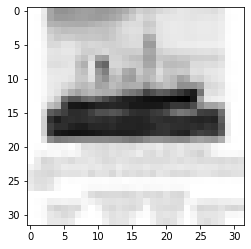

In [126]:
#ver imagenes en blanco y negro (solamente para verificar si esta bien despues del reshape)
trainSetWB.shape
x =np.reshape(trainSetWB,[50000,1024])/256
plt.imshow(np.reshape(x[7],[32,32]),cmap='gray')

In [32]:
#calculo de pesos
w = redn(x,Y,ep=20,le=1000)

In [56]:
print(x.shape)
print(Y.shape)
print(len(w[0]))

#Porcentaje bien clasificados
w = np.array(w)
Yt = p_i(x,w[0])
p=bienClasificados(Y,Yt) 
print(p)

(50000, 1024)
(50000, 10)
1025
0.820528
